In [1]:
#import packages
import pandas as pd
import numpy as np
import random
import re
import string
#import requests
#import plotnine 
#from plotnine import *
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

#may need to pip install first
#!pip install netwulf
from netwulf import visualize
import netwulf as nw
import networkx as nx


# Data Prep

## Load in Data

In [2]:
# Define the file path
pre_file_path = '../code/data/Med student pre assessment 2.8.23.csv'
foundational_file_path = '../code/data/Foundational Post Assessment 2.8.23.csv'
intermediate_file_path = '../code/data/intermediate post assessment 2.8.23.csv'
advanced_file_path = '../code/data/Advanced post assessment 2.8.23.csv'

# Load the datasets using pandas
pre_data = pd.read_csv(pre_file_path)
post_data_foundational = pd.read_csv(foundational_file_path,skiprows =lambda x: x in [1,2])
post_data_intermediate = pd.read_csv(intermediate_file_path,skiprows =lambda x: x in [1,2])
post_data_advanced = pd.read_csv(advanced_file_path,skiprows =lambda x: x in [1,2])


## Merge Data

In [3]:
#merge pre to foundational post, where scox = pre score, scoy = post score
joined_data_foundational = pd.merge(post_data_foundational, pre_data, on = "IPAddress", how = "left")
joined_data_intermediate = pd.merge(post_data_intermediate, pre_data, on = "IPAddress", how = "left")
joined_data_advanced = pd.merge(post_data_advanced, pre_data, on = "IPAddress", how = "left")


## Rename columns

In [4]:
#renaming the columns, SC0y = pre, SC0x = post for clarity:
foundational_data = joined_data_foundational.rename(columns={'SC0_y':'Pre', 'SC0_x':'Post'})
#drop missing data from Pre and Post
foundational_data = foundational_data.dropna(subset=['Pre', 'Post'])

#do the same for two other cohorts
intermediate_data = joined_data_intermediate.rename(columns={'SC0_y':'Pre', 'SC0_x':'Post'})
intermediate_data = intermediate_data.dropna(subset=['Pre', 'Post'])

advanced_data = joined_data_advanced.rename(columns={'SC0_y':'Pre', 'SC0_x':'Post'})
advanced_data = advanced_data.dropna(subset=['Pre', 'Post'])

## Data prep for histograms:

In [5]:
#transform to long format 
foundational_plot_data = foundational_data[['Pre', 'Post']].melt().rename(columns={'variable': 'Condition', 'value': "SC0"})
foundational_plot_data['SC0'] = foundational_plot_data['SC0'].astype(int)

#do the same for two other cohorts
intermediate_plot_data = intermediate_data[['Pre', 'Post']].melt().rename(columns={'variable': 'Condition', 'value': "SC0"})
intermediate_plot_data['SC0'] = intermediate_plot_data['SC0'].astype(int)

advanced_plot_data = advanced_data[['Pre', 'Post']].melt().rename(columns={'variable': 'Condition', 'value': "SC0"})
advanced_plot_data['SC0'] = advanced_plot_data['SC0'].astype(int)

# Visualization

## Code for foundational histogram

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


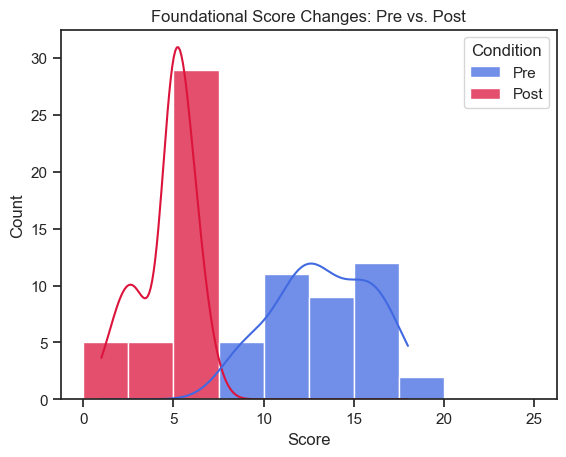

In [9]:
#specifying individual colors for each condition
colors = {"Pre": "royalblue", "Post": "crimson"} 

#create plot
sns.histplot(
    data=foundational_plot_data,
    x='SC0',
    hue='Condition',
    palette=colors,  # Apply the color mapping
    binrange=[0, 25],
    binwidth=2.5,
    alpha=0.75,  # Adjusts opacity
    kde=True 
)

plt.title('Foundational Score Changes: Pre vs. Post')  # Title of the plot
plt.xlabel('Score')  # Label for the x-axis
plt.ylabel('Count')  # Label for the y-axis
sns.set(style="ticks")

#plt.savefig('foundational_histogram.png')
plt.show()


## Code for intermediate histogram

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


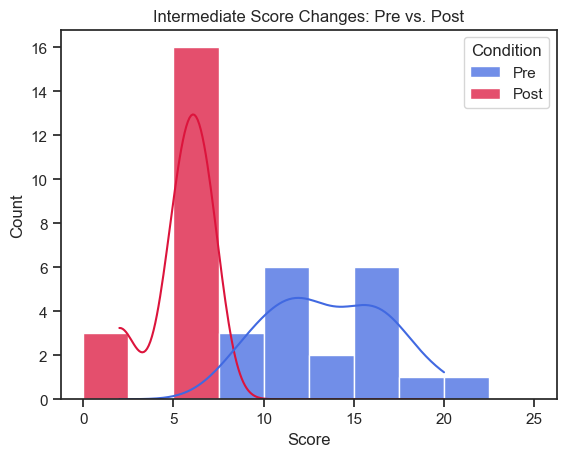

In [10]:
# Plotting
sns.histplot(
    data=intermediate_plot_data,
    x='SC0',
    hue='Condition',
    palette=colors,  # Applying the color mapping
    binrange=[0, 25],
    binwidth=2.5,
    alpha=0.75,  # Adjusting opacity
    kde=True 
)

plt.title('Intermediate Score Changes: Pre vs. Post')  # Updated title for the intermediate cohort
plt.xlabel('Score')  # Label for the x-axis
plt.ylabel('Count')  # Label for the y-axis
sns.set(style="ticks")  # Setting the style to 'ticks' to remove the grid

#plt.savefig('intermediate_histogram.png')
plt.show()


## Code for advanced histogram

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


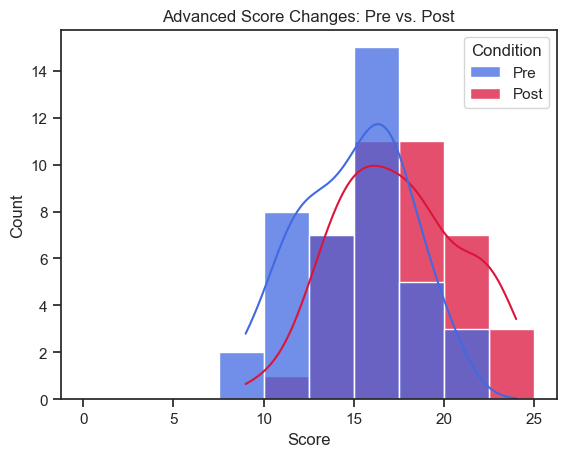

In [11]:
# Specifying individual colors for each condition
colors = {"Pre": "royalblue", "Post": "crimson"}  # Custom colors for the conditions

# Plotting
sns.histplot(
    data=advanced_plot_data,
    x='SC0',
    hue='Condition',
    palette=colors,  # Applying the color mapping
    binrange=[0, 25],
    binwidth=2.5,
    alpha=0.75,  # Adjusting opacity
    kde=True 
)

plt.title('Advanced Score Changes: Pre vs. Post')  # Updated title for the advanced cohort
plt.xlabel('Score')  # Label for the x-axis
plt.ylabel('Count')  # Label for the y-axis
sns.set(style="ticks")  # Setting the style to 'ticks' to remove the grid

#plt.savefig('advanced_histogram.png') 
plt.show()
